## 一元线性回归

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
boston = datasets.load_boston()

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

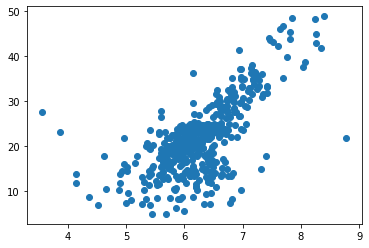

In [5]:
x = boston.data[:,5]
y = boston.target

x = x[y<50]
y = y[y<50]

plt.scatter(x,y)
plt.show()

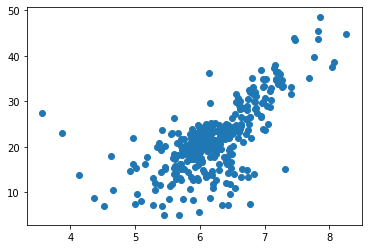

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

plt.scatter(x_train, y_train)
plt.show()

## 一元线性回归公式实现

In [7]:
def fit(x, y):
    a_up = np.sum((x-np.mean(x))*(y - np.mean(y)))
    a_bottom = np.sum((x-np.mean(x))**2)
    a = a_up / a_bottom
    b = np.mean(y) - a * np.mean(x)
    return a, b

In [8]:
a, b = fit(x_train, y_train)
a, b

(8.056822140369603, -28.49306872447786)

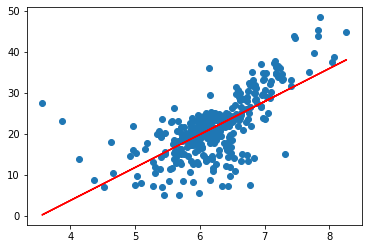

In [9]:
plt.scatter(x_train, y_train)
plt.plot(x_train, a*x_train+ b, c='r')
plt.show()

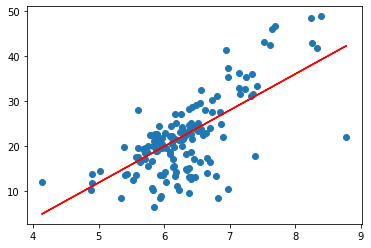

In [10]:
plt.scatter(x_test, y_test)
plt.plot(x_test, a*x_test+ b, c='r')
plt.show()

## sklearn实现一元线性回归

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(x_train.reshape(-1,1), y_train)

LinearRegression()

In [12]:
y_predict = lin_reg.predict(x_test.reshape(-1,1))

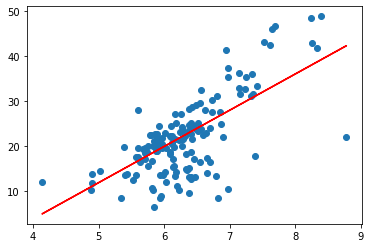

In [13]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_predict, c='r')
plt.show()

## sklearn 实现多元线性回归

In [14]:
x = boston.data
y = boston.target

x = x[y<50]
y = y[y<50]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [15]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [16]:
lin_reg.score(x_test, y_test)

0.7455942658788952

## 归一化？

In [17]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(x_train)
x_train = standardScaler.transform(x_train)
x_test = standardScaler.transform(x_test)

In [18]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [19]:
lin_reg.score(x_test, y_test)

0.7455942658788963